In [44]:
import os
import PIL.Image as piImg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
import shutil

In [45]:
base_url = 'C:/Users/M/Downloads/applestraw'

In [46]:
train_dir = os.path.join(base_url, 'train')
test_dir = os.path.join(base_url, 'test')

In [47]:
os.mkdir(train_dir)
os.mkdir(test_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/M/Downloads/applestraw\\train'

In [48]:
train_str_dir = os.path.join(train_dir, 'strawberry')
train_apple_dir = os.path.join(train_dir, 'apple')
test_str_dir = os.path.join(test_dir, 'strawberry')
test_apple_dir = os.path.join(test_dir, 'apple')

In [49]:
os.mkdir(train_str_dir)
os.mkdir(train_apple_dir)
os.mkdir(test_str_dir)
os.mkdir(test_apple_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/M/Downloads/applestraw\\train\\strawberry'

In [50]:
strawberry_files = os.listdir(base_url + '/strawberry')
apple_files = os.listdir(base_url + '/apple')[:400]

In [51]:
print(len(strawberry_files), len(apple_files))

400 400


In [52]:
for f in strawberry_files[:320]:
    shutil.copy(base_url + '/strawberry/' + f, train_str_dir)
for f in strawberry_files[320:]:
    shutil.copy(base_url + '/strawberry/' + f, test_str_dir)

for f in apple_files[:320]:
    shutil.copy(base_url + '/apple/' + f, train_apple_dir)
for f in apple_files[320:]:
    shutil.copy(base_url + '/apple/' + f, test_apple_dir)

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

import numpy as ny
import matplotlib.pyplot as plt
import os

In [83]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [84]:
train_data_importer = train_datagen.flow_from_directory(
    'C:/Users/M/Downloads/applestraw/train',
    target_size=(250, 250),
    batch_size=32,
    class_mode='binary'
)

val_data_importer = train_datagen.flow_from_directory(
    'C:/Users/M/Downloads/applestraw/test',
    target_size=(250, 250),
    batch_size=32,
    class_mode='binary'
)

Found 640 images belonging to 2 classes.


Found 160 images belonging to 2 classes.


In [85]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 27, 27, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │    11,075,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,508,033 (43.90 MB)

 Trainable params: 11,508,033 (43.90 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

model_dir = './model/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [88]:
hist = model.fit(
    train_data_importer,
    epochs=50,
    validation_data=val_data_importer,
    callbacks=[checkpoint, early_stopping_callback]
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4744 - loss: 0.7187 - val_accuracy: 0.7188 - val_loss: 0.6467
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6955 - loss: 0.6191 - val_accuracy: 0.7750 - val_loss: 0.5774
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7708 - loss: 0.5316 - val_accuracy: 0.7812 - val_loss: 0.5396
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7469 - loss: 0.5234 - val_accuracy: 0.7875 - val_loss: 0.4630
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8045 - loss: 0.4224 - val_accuracy: 0.7875 - val_loss: 0.4773
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8086 - loss: 0.4424 - val_accuracy: 0.8000 - val_loss: 0.4795
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8258 - loss: 0.3608 - val_accuracy: 0.8125 - val_loss: 0.4482
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8418 - loss: 0.3916 - val_accuracy: 0.8000 - val_loss:

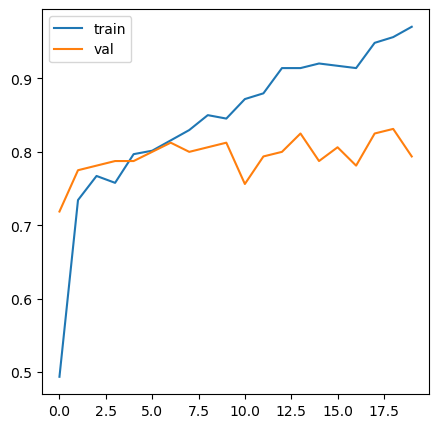

In [89]:
fig = plt.figure(figsize=(5,5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()